In [1]:
"""
We sample strings randomly from a DFA to get regular languages. Steps: 
1. Design a DFA (regular language). 
2. Sample randomly. 
3. Write to output
"""

import random

from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA

N_ACCEPTING_STRINGS = int(10e3) # for both accepting and rejecting
N_REJECTING_STRINGS = int(10e3) # for both accepting and rejecting

MAX_STRING_SIZE = 10 # the max size of the strings we want to generate

limit_sizes = True # we limit the number of lengths, useful to not have a distribution of shorter strings. 
# Works only with ONLY_ACCEPTING_TRACES set to true 
size_limits = {
    2: 1000,
    4: 3000,
    6: 5000
}

# length of strings randomly selected between [1, MAX_STRING_SIZE] if set to True, 
# else all strings will be of size MAX_STRING_SIZE
VARIABLE_LENGTH = True 

ONLY_ACCEPTING_TRACES = False

OUTF_NAME = "problem_1_train_dfa_accept_and_reject.dat"

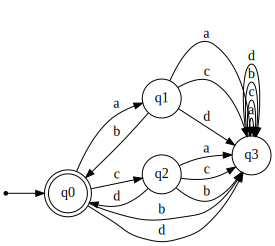

In [2]:
# this one accepts any string ending with 00 or 11, taken from https://pypi.org/project/visual-automata/#visualdfa
if False:
    dfa = DFA(
        states={"q0", "q1", "q2", "q3", "q4"},
        input_symbols={"0", "1"},
        transitions={
            "q0": {"0": "q3", "1": "q1"},
            "q1": {"0": "q3", "1": "q2"},
            "q2": {"0": "q3", "1": "q2"},
            "q3": {"0": "q4", "1": "q1"},
            "q4": {"0": "q4", "1": "q1"},
        },
        initial_state="q0",
        final_states={"q2", "q4"},
    )

    dfa_visual = VisualDFA(
        states={"q0", "q1", "q2", "q3", "q4"},
        input_symbols={"0", "1"},
        transitions={
            "q0": {"0": "q3", "1": "q1"},
            "q1": {"0": "q3", "1": "q2"},
            "q2": {"0": "q3", "1": "q2"},
            "q3": {"0": "q4", "1": "q1"},
            "q4": {"0": "q4", "1": "q1"},
        },
        initial_state="q0",
        final_states={"q2", "q4"},
    )

elif False: # useful with transformers?
    dfa = DFA(
        states={"q0", "q1"},
        input_symbols={"0", "1"},
        transitions={
            "q0": {"0": "q0", "1": "q1"},
            "q1": {"0": "q1", "1": "q1"},
        },
        initial_state="q0",
        final_states={"q1"},
    )

    dfa_visual = VisualDFA(
        states={"q0", "q1"},
        input_symbols={"0", "1"},
        transitions={
            "q0": {"0": "q0", "1": "q1"},
            "q1": {"0": "q1", "1": "q1"},
        },
        initial_state="q0",
        final_states={"q1"},
    )
    
elif True:
    dfa = DFA(
        states={"q0", "q1", "q2", "q3"},
        input_symbols={"a", "b", "c", "d"},
        transitions={
            "q0": {"a": "q1", "c": "q2", "b": "q3", "d": "q3"},
            "q1": {"a": "q3", "c": "q3", "b": "q0", "d": "q3"},
            "q2": {"a": "q3", "c": "q3", "b": "q3", "d": "q0"},
            "q3": {"a": "q3", "c": "q3", "b": "q3", "d": "q3"},
        },
        initial_state="q0",
        final_states={"q0"},
    )

    dfa_visual = VisualDFA(
        states={"q0", "q1", "q2", "q3"},
        input_symbols={"a", "b", "c", "d"},
        transitions={
            "q0": {"a": "q1", "c": "q2", "b": "q3", "d": "q3"},
            "q1": {"a": "q3", "c": "q3", "b": "q0", "d": "q3"},
            "q2": {"a": "q3", "c": "q3", "b": "q3", "d": "q0"},
            "q3": {"a": "q3", "c": "q3", "b": "q3", "d": "q3"},
        },
        initial_state="q0",
        final_states={"q0"},
    )
dfa_visual.show_diagram()

In [3]:
dfa.accepts_input("ac"), dfa.accepts_input("ab")

(False, True)

In [4]:
input_alphabet = list(dfa.input_symbols)
input_alphabet

['b', 'd', 'c', 'a']

In [5]:
def generate_random_string(alphabet, size, random_length=False):
    """
    alphabet: list(string)
    size: int
    """
    res = ""
    output_size = size if not random_length else random.randint(1, size)
    for i in range(output_size):
        res += random.choice(alphabet)
    return res

In [6]:
if not ONLY_ACCEPTING_TRACES:
    accepting_counter = 0
    rejecting_counter = 0

    strings = list()
    labels = list()

    if limit_sizes:
        accepting_size_count_dict = dict()
        rejecting_size_count_dict = dict()

    while accepting_counter < N_ACCEPTING_STRINGS or rejecting_counter < N_REJECTING_STRINGS:
        s = generate_random_string(input_alphabet, MAX_STRING_SIZE, random_length=VARIABLE_LENGTH)
        if dfa.accepts_input(s) and accepting_counter < N_ACCEPTING_STRINGS:

            if limit_sizes and len(s) in size_limits:
                l = len(s)
                if l not in accepting_size_count_dict:
                    accepting_size_count_dict[l] = 0
                if accepting_size_count_dict[l] > size_limits[l]:
                    continue
                accepting_size_count_dict[l] += 1

            strings.append(s)
            labels.append("1")
            
            accepting_counter += 1
            if accepting_counter % 1000 == 0:
                print("Accepting strings: ", accepting_counter)

        elif rejecting_counter < N_REJECTING_STRINGS and not dfa.accepts_input(s):

            if limit_sizes and len(s) in size_limits:
                l = len(s)
                if l not in rejecting_size_count_dict:
                    rejecting_size_count_dict[l] = 0
                if rejecting_size_count_dict[l] > size_limits[l]:
                    continue
                rejecting_size_count_dict[l] += 1

            strings.append(s)
            labels.append("0")
            
            rejecting_counter += 1
            if rejecting_counter % 1000 == 0:
                print("Rejecting strings: ", rejecting_counter)
                                
else:
    accepting_counter = 0
    strings = list()
    labels = list()
    
    if limit_sizes:
        size_count_dict = dict()
    
    while accepting_counter < N_ACCEPTING_STRINGS:
        s = generate_random_string(input_alphabet, MAX_STRING_SIZE, random_length=VARIABLE_LENGTH)
        if dfa.accepts_input(s):
            
            if limit_sizes and len(s) in size_limits:
                l = len(s)
                if l not in size_count_dict:
                    size_count_dict[l] = 0
                if size_count_dict[l] > size_limits[l]:
                    continue
                size_count_dict[l] += 1
            
            strings.append(s)
            labels.append("1")

            accepting_counter += 1
            if accepting_counter % 1000 == 0:
                print("Accepting strings: ", accepting_counter)

Rejecting strings:  1000
Rejecting strings:  2000
Rejecting strings:  3000
Rejecting strings:  4000
Rejecting strings:  5000
Rejecting strings:  6000
Rejecting strings:  7000
Rejecting strings:  8000
Rejecting strings:  9000
Rejecting strings:  10000
Accepting strings:  1000
Accepting strings:  2000
Accepting strings:  3000
Accepting strings:  4000
Accepting strings:  5000
Accepting strings:  6000
Accepting strings:  7000
Accepting strings:  8000
Accepting strings:  9000
Accepting strings:  10000


In [7]:
with open(OUTF_NAME, "wt") as outf:
    outf.write("{} {}".format(len(strings), len(input_alphabet)))
    for s, l in zip(strings, labels):
        outf.write("\n{} {} {}".format(l, len(s), " ".join(s)))